In [1]:
# Import Libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    roc_curve
)

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Model-Ready Dataset Prepared in Feature Engineering Notebook
df = pd.read_csv('telco_feature_engineered.csv')

df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,TotalCharges,Churn,gender_Male,InternetService_Fiber optic,InternetService_No,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,0,0,1,0,0,...,29.85,0,False,False,False,False,False,False,True,False
1,0,0,0,34,1,0,1,0,1,0,...,1889.50,0,True,False,False,True,False,False,False,True
2,0,0,0,2,1,0,1,1,0,0,...,108.15,1,True,False,False,False,False,False,False,True
3,0,0,0,45,0,0,1,0,1,1,...,1840.75,0,True,False,False,True,False,False,False,False
4,0,0,0,2,1,0,0,0,0,0,...,151.65,1,False,True,False,False,False,False,True,False


In [3]:
# Feature-Target Split
X = df.drop('Churn', axis=1)
y = df['Churn']

X.shape, y.shape

((7043, 23), (7043,))

In [4]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train.shape, X_test.shape

((5634, 23), (1409, 23))

**Baseline Model**

In [5]:
# Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [6]:
# Predictions & Probabilities
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

In [7]:
# Evaluation: Logistic Regression
print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))

print("\nClassification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

roc_auc_log = roc_auc_score(y_test, y_prob_log)
print("ROC-AUC (Logistic Regression):", roc_auc_log)

Confusion Matrix (Logistic Regression):
[[923 112]
 [167 207]]

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409

ROC-AUC (Logistic Regression): 0.8425973287865872


**Advanced Model**

In [8]:
# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [9]:
# Predictions & Probabilities
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

In [10]:
# Evaluation: Random Forest
print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print("ROC-AUC (Random Forest):", roc_auc_rf)

Confusion Matrix (Random Forest):
[[928 107]
 [193 181]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.77      0.79      0.78      1409

ROC-AUC (Random Forest): 0.8275736908729235


**Model Comparison**

In [11]:
# Comparison Table
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'ROC-AUC': [roc_auc_log, roc_auc_rf]
})

comparison_df

,Model,ROC-AUC
0,Logistic Regression,0.842597
1,Random Forest,0.827574


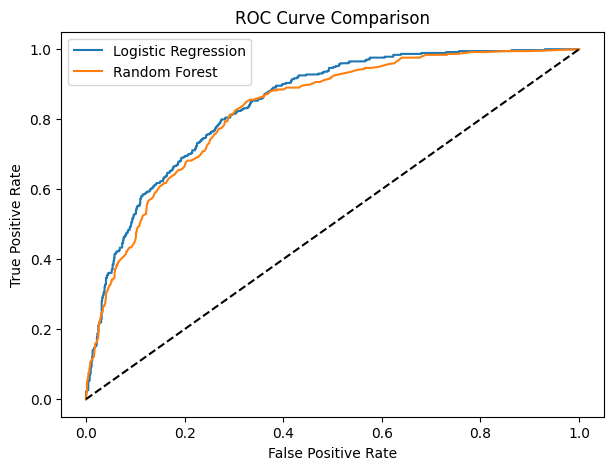

In [12]:
# ROC Curve Plot
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(fpr_log, tpr_log, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1], [0,1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

In [13]:
# Save the final selected model
import joblib
joblib.dump(log_model, 'final_model.pkl')

['final_model.pkl']

**Model Evaluation - Key Interpretations & Takeaways**


*   A baseline Logistic Regression model was developed to establish a reference level of performance for customer churn prediction. The model provides interpretable results and serves as a benchmark for comparison.

*   An advanced Random Forest model was trained to capture potential non-linear relationships and feature interactions that may not be fully addressed by the baseline model.

*   Model performance was evaluated using confusion matrices, classification reports, and ROC-AUC scores to ensure a comprehensive assessment beyond accuracy alone.
*   Based on the ROC-AUC comparison, the model demonstrating higher discriminatory power between churned and non-churned customers will be selected for further explainability and business insight analysis in the next stage.


*   The evaluation confirms that the dataset and engineered features are suitable for predictive modeling, and the selected model can be used to identify customers at higher risk of churn.
